In [3]:
df = df.dropna()

First few rows:
     ID  Word_Count  Number_of_Sentence  Unique_Words  Average_Word_Length  \
0  1606          10                   4            24             6.176750   
1  3718          10                   8            25             5.826770   
2  2634          10                   7            18             4.619040   
3  5560          10                   6            18             4.961424   
4  7494          10                   4            21             4.114324   

   Label  
0      1  
1      1  
2      1  
3      1  
4      1  

Dataset shape: (4500, 6)

Column names: ['ID', 'Word_Count', 'Number_of_Sentence', 'Unique_Words', 'Average_Word_Length', 'Label']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   int64  
 1   Word_Count           45

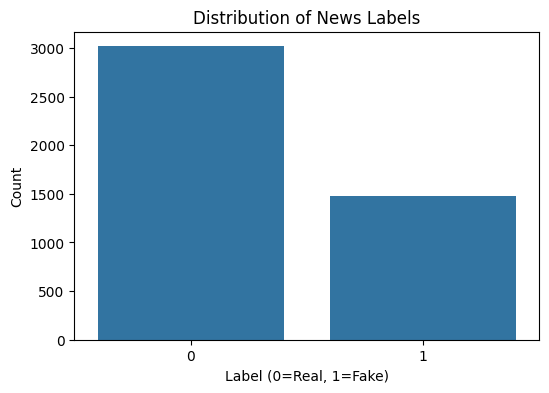

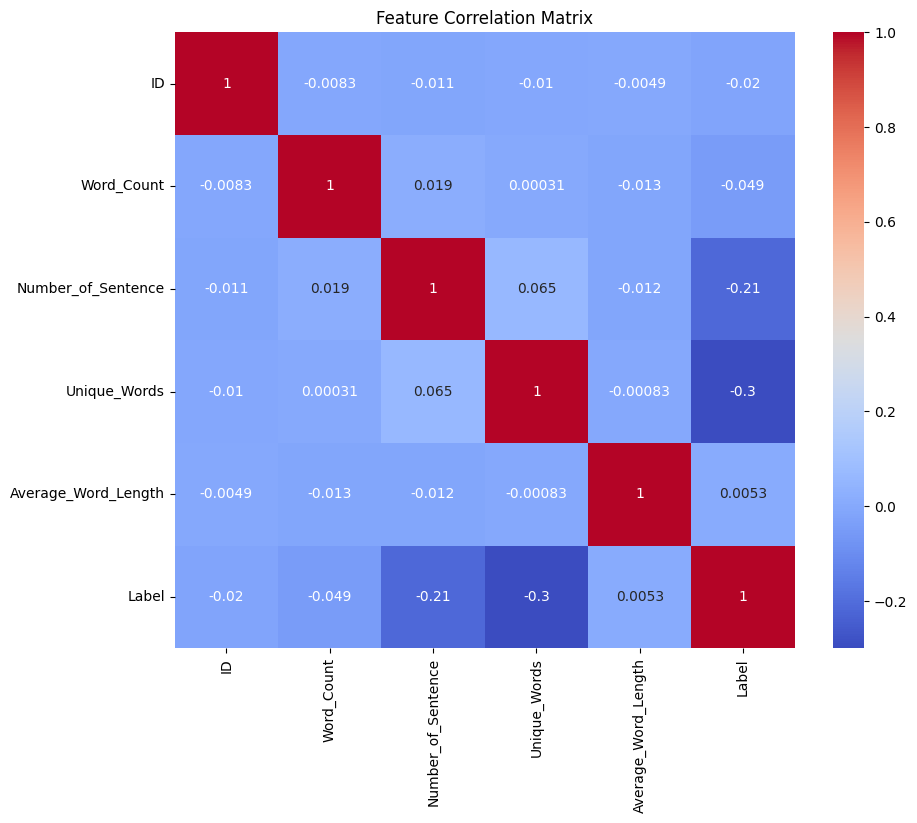


Logistic Regression Results:
Accuracy: 0.6355555555555555

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.75       595
           1       0.43      0.22      0.29       305

    accuracy                           0.64       900
   macro avg       0.55      0.54      0.52       900
weighted avg       0.59      0.64      0.60       900


Random Forest Results:
Accuracy: 0.8933333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       595
           1       0.79      0.94      0.86       305

    accuracy                           0.89       900
   macro avg       0.88      0.90      0.89       900
weighted avg       0.91      0.89      0.90       900



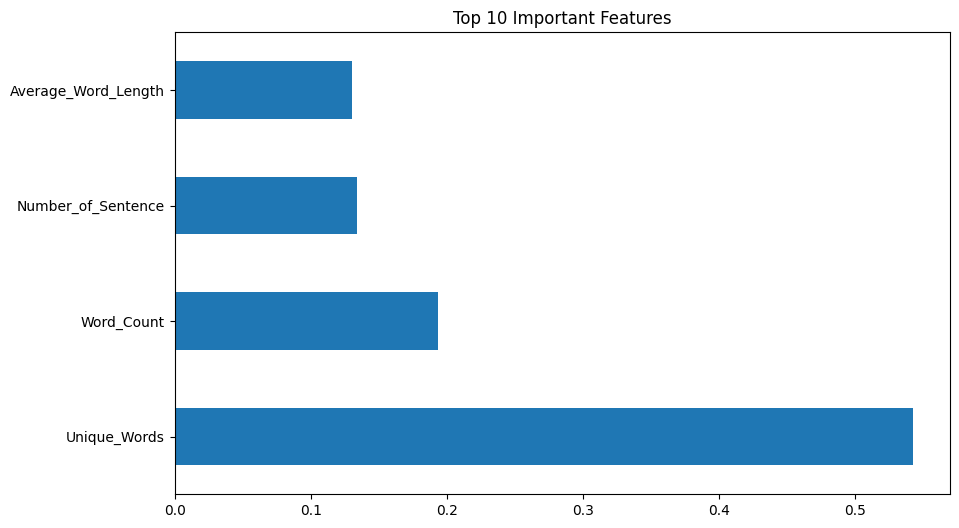

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c6fd1473b96b1684d1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [57]:
# Load the Dataset
import pandas as pd

df = pd.read_csv('Fake News Detection Dataset.csv')

# Data Exploration
print("First few rows:")
print(df.head())

print("\nDataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

print("\nData types and non-null counts:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# Check for Missing Values and Duplicates
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

# Visualize the Data
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title('Distribution of News Labels')
plt.xlabel('Label (0=Real, 1=Fake)')
plt.ylabel('Count')
plt.show()

# Correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Prepare Data for Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(['ID', 'Label'], axis=1)
y = df['Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and Evaluate Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

# Create a Prediction Function
def predict_news(Word_Count, Number_of_Sentence, Unique_Words, Average_Word_Length):
    # Create input dictionary
    input_data = {
        'Word_Count': Word_Count,
        'Number_of_Sentence': Number_of_Sentence,
        'Unique_Words': Unique_Words,
        'Average_Word_Length': Average_Word_Length
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Scale the input
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = rf.predict(input_scaled)[0]
    probability = rf.predict_proba(input_scaled)[0][1]

    return "Fake" if prediction == 1 else "Real", f"{probability*100:.2f}% confidence"

# Create Gradio Interface
import gradio as gr

inputs = [
    gr.Number(label="Word Count"),
    gr.Number(label="Number of Sentences"),
    gr.Number(label="Number of Unique Words"),
    gr.Number(label="Average Word Length")
]

outputs = [
    gr.Textbox(label="Prediction"),
    gr.Textbox(label="Confidence Score")
]

gr.Interface(
    fn=predict_news,
    inputs=inputs,
    outputs=outputs,
    title="📰 Fake News Detector",
    description="Enter article characteristics to predict whether it's real or fake news.",
    examples=[
        [300, 15, 150, 5.2],
        [500, 25, 200, 6.8],
        [200, 10, 50, 4.5]
    ]
).launch()

In [55]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


In [56]:
!pip install gradio --quiet